# Packages

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Tests
from scipy.stats import chi2_contingency

# Others
import os

# Setting parameters
sns.set_palette("dark")
sns.set_style("whitegrid")

#os.chdir(r'J:\Estudo\Projetos\telecom_churn_prediction')
os.chdir(r'C:\repositorios_pessoais\telecom_churn_prediction')

pd.set_option('display.max_columns', 25)

# Data Overview

## Importing 

In [4]:
df = pd.read_csv(r'data\telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
rows, columns = df.shape

print(f'There are {rows} rows, and {columns} columns')

There are 7043 rows, and 21 columns


## Missing values
- There are no missing values

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Analysis on each column

## Qualitative Variables
1. gender
2. SeniorCitizen
3. Partner
4. Dependents
5. PhoneService
6. MultipleLines
7. InternetService
8. OnlineSecurity
9. OnlineBackup
10. DeviceProtection
11. TechSupport
12. StreamingTV
13. StreamingMovies
14. Contract
15. PaperlessBilling
16. PaymentMethod

### Gender
- Desc: The customer’s gender: Male, Female
- Dtype: String
- Obs:
    - It seems that gender doesn't affects it 
    - Needs to be one-hot-encoded if selected

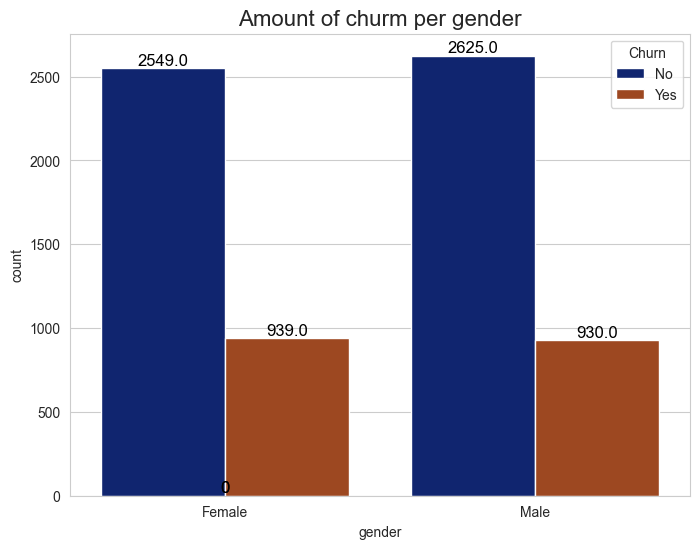

In [7]:
plt.figure(figsize = (8, 6))

ax = sns.countplot(
    x = 'gender',
    data = df,
    hue = 'Churn'
)
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}', 
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha = 'center', va = 'bottom', fontsize = 12, color = 'black'
    )

plt.title('Amount of churm per gender', fontsize = 16)
plt.show()

- H0: There is no significant association or dependence between customer gender and churn.
- H1: There is a significant association between customer gender and churn.

In [8]:
df_cross = pd.crosstab(df['Churn'], df['gender'])
display(df_cross)

p_value = chi2_contingency(df_cross)[1]

significance = 0.05
if p_value < significance:
    print(f'There is a significant association between customer gender and churn, \nconsidering a significance of {significance} and a p-value of {p_value:.2e}')
else:
    print(f'There is no significant association or dependence between customer gender and churn, \nconsidering a significance of {significance} and a p-value of {p_value:.2e}')

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


There is no significant association or dependence between customer gender and churn, 
considering a significance of 0.05 and a p-value of 4.87e-01


### Senior Citizen
- Desc: Indicates if the customer is 65 or older: 1 (Yes), 0 (No)
- Dtype: Integer
- Obs:
    - It seems that be a senior citizen affects the churn rate
    - This variable is unbalanced

In [9]:
# Creating a function to simplify this process
def check_qualitative_variable(variable : str, data : pd.DataFrame, significance : float = 0.05, primary_variable : str = 'Churn'):
    df_cross = pd.crosstab(data[primary_variable], data[variable])

    p_value = chi2_contingency(df_cross)[1]

    if p_value < significance:
        title = f'There is a significant association between customer {variable} and {primary_variable}, \nconsidering a chi2 significance of {significance * 100}% and a p-value of {p_value:.2e}'
    else:
        title = f'There is no significant association or dependence between customer {variable} and {primary_variable}, \nconsidering a chi2 significance of {significance * 100}% and a p-value of {p_value:.2e}'

    plt.figure(figsize = (8, 7))
    ax = sns.countplot(
        x = variable,
        data = data,
        hue = primary_variable
    )
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height()}', 
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center', va='bottom', fontsize=12, color='black'
        )

    plt.suptitle(f'Amount of {primary_variable} per {variable}', fontsize = 16)
    plt.title(title, fontsize = 12, y = 1)
    plt.show()

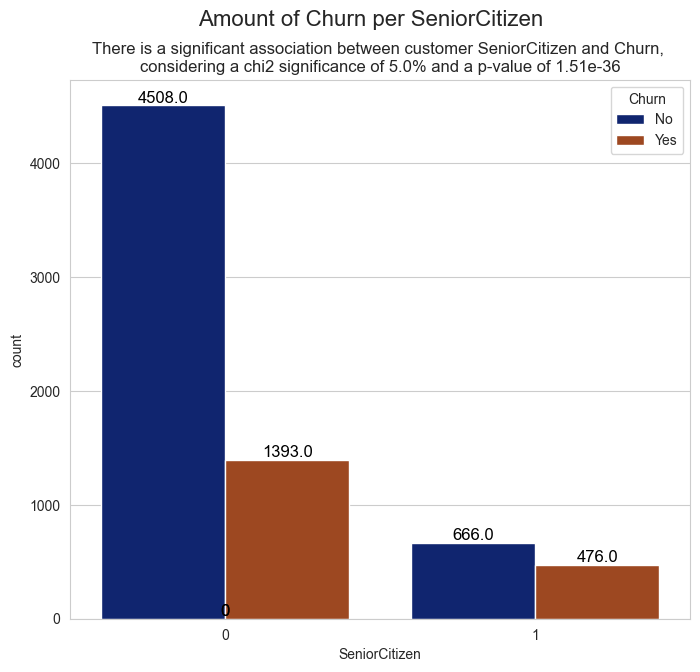

In [10]:
check_qualitative_variable(variable = 'SeniorCitizen', data = df)

### Partner
- Desc: Indicates if the customer is married: Yes, No
- Dtype: String
- Obs:
    - It seems that having a partner affects the churn rate
    - Needs to be binary encoded

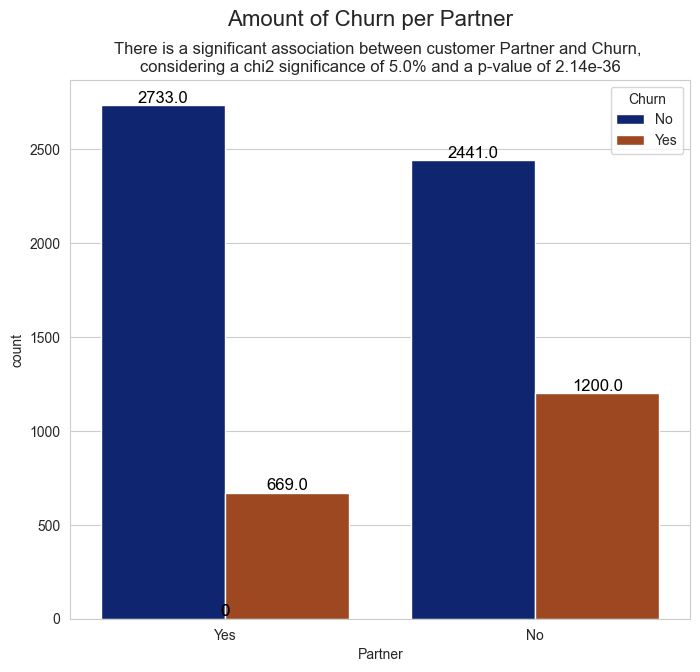

In [11]:
check_qualitative_variable(variable = 'Partner', data = df)

### Dependents
- Desc: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- Dtype: String
- Obs:
    - It seems that having a partner affects the churn rate
    - Needs to be binary encoded

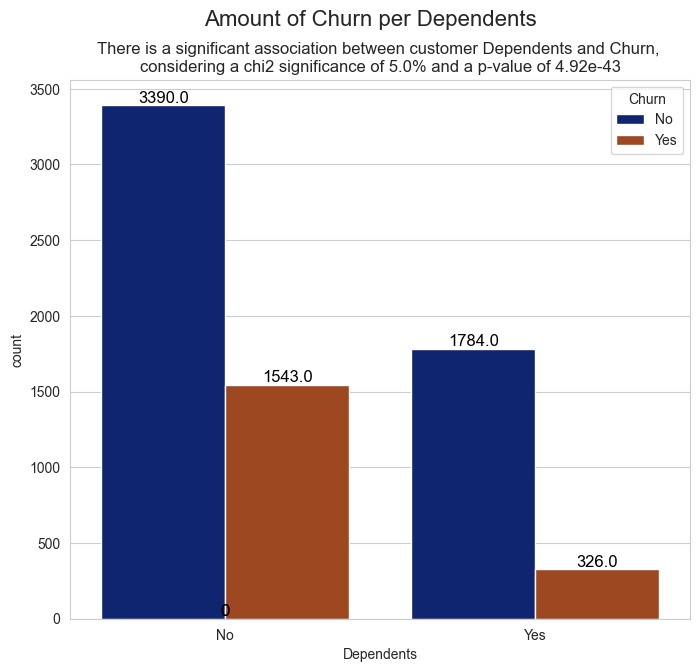

In [12]:
check_qualitative_variable(variable = 'Dependents', data = df)

### Phone Service
- Desc: Indicates if the customer subscribes to home phone service with the company: Yes, No
- Dtype: String
- Obs:
    - It seems that having a phone service doesn't affects the churn rate
    - Needs to be binary encoded
    - This variable is unbalanced

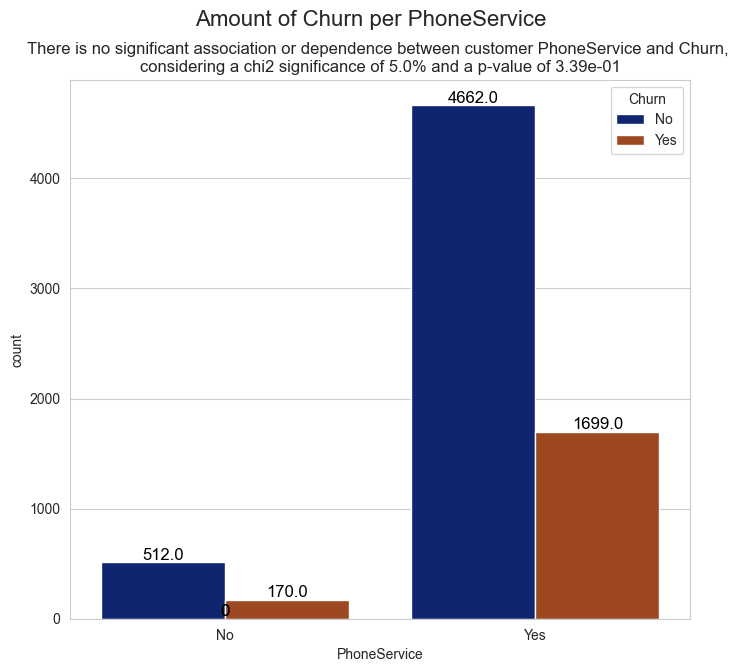

In [13]:
check_qualitative_variable('PhoneService', df)

### Multiple Lines
- Desc: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No (Just one line), No Phone Service
- Obs:
    - It seems that this variable affects the churn rate
    - Needs to be one-hot-encoded
    - This variable is unbalanced

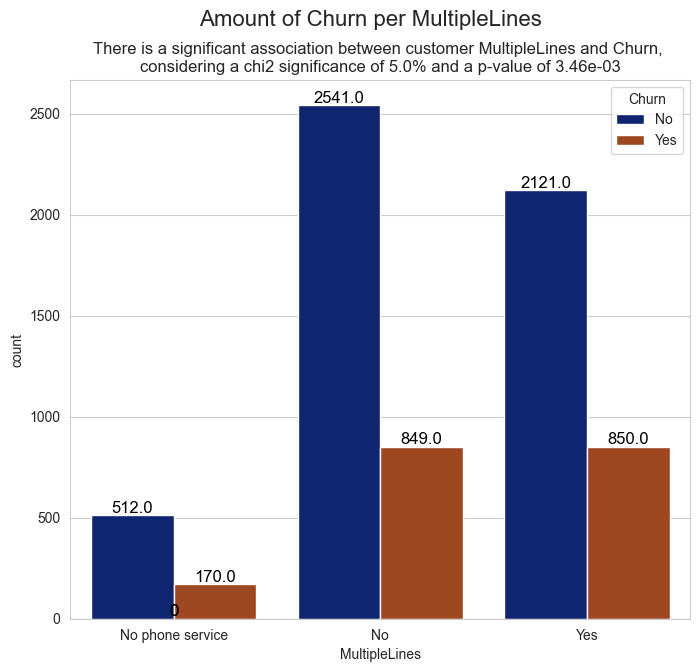

In [14]:
check_qualitative_variable('MultipleLines', df)

### Internet Service
- Desc: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic.
- Dtype: String
- Obs:
    - It seems that the type of internet service, whether one has it or not, affects the churn rate
    - Needs to be one-hot-encoded
    - DSL is the broadband internet access technology that utilizes a portion of the available bandwidth on a telephone line to transmit digital data

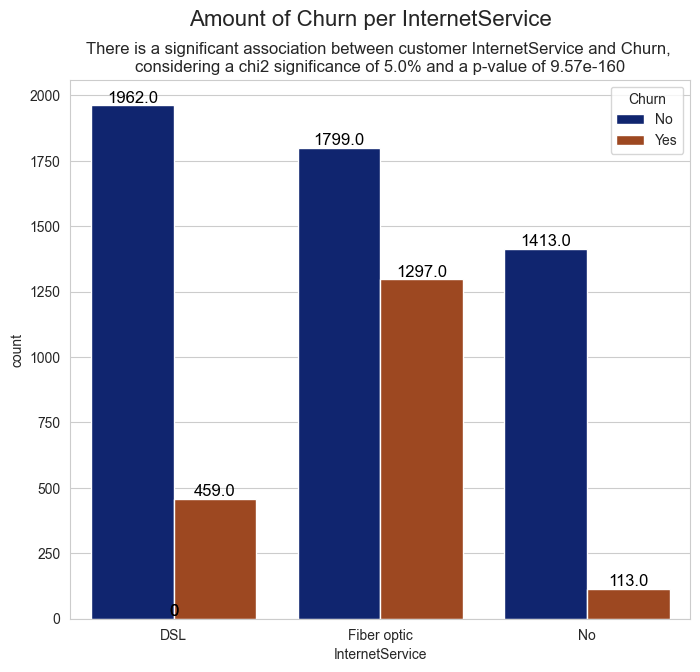

In [15]:
check_qualitative_variable('InternetService', df)

### Online Security
- Desc: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- Dtype: String
- Obs:
    - It seems this variable affects the churn rate
    - Needs to be one-hot-encoded
    - The "No internet service" class is the same of the "Internet Service" variable

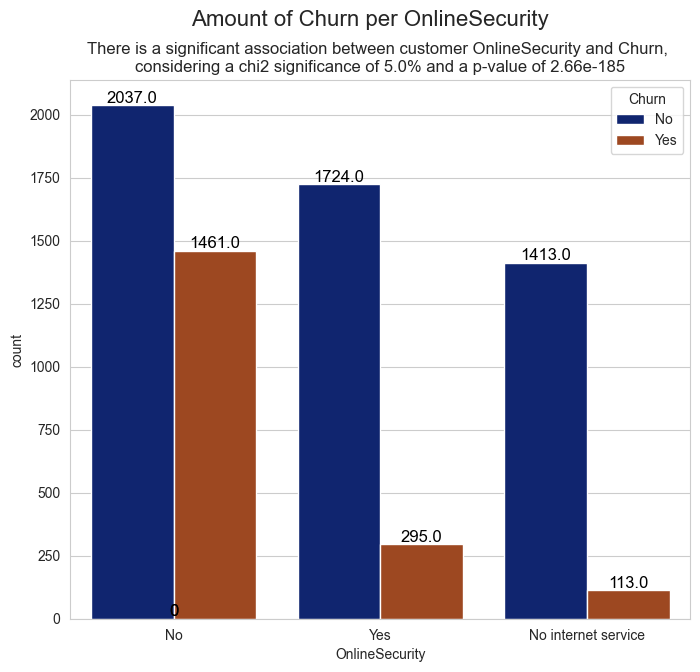

In [16]:
check_qualitative_variable('OnlineSecurity', df)

### Online Backup
- Desc: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- Dtype: String
- Obs:
    - It seems this variable affects the churn rate
    - Needs to be one-hot-encoded
    - The "No internet service" class is the same of the "Internet Service" variable

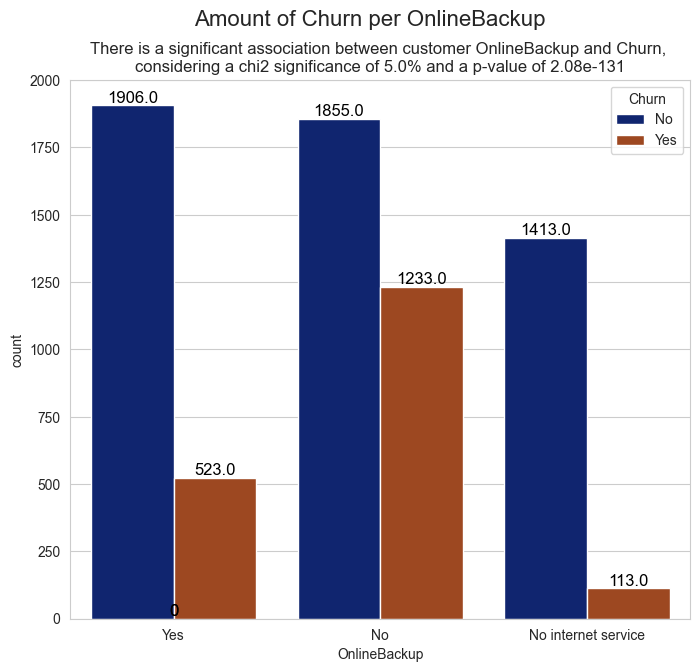

In [17]:
check_qualitative_variable('OnlineBackup', df)

### Device Protection
- Desc: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- Dtype: String
- Obs:
    - It seems this variable affects the churn rate
    - Needs to be one-hot-encoded
    - The "No internet service" class is the same of the "Internet Service" variable

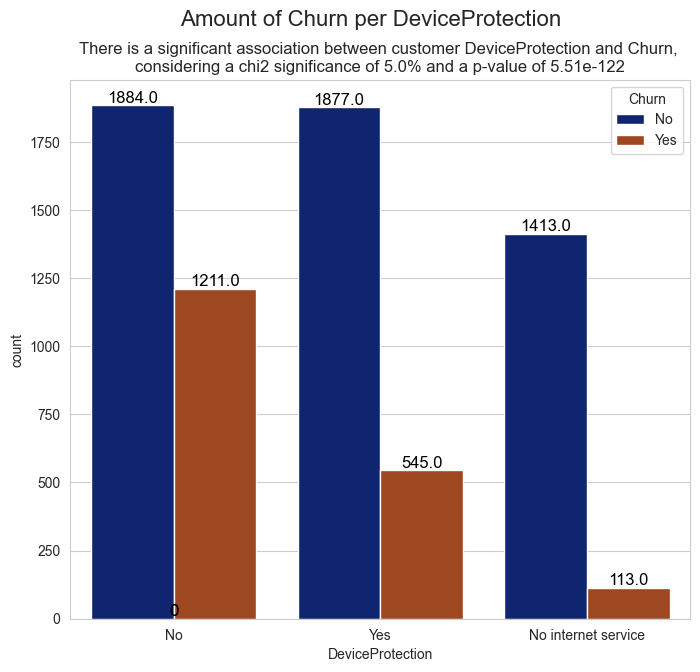

In [18]:
check_qualitative_variable('DeviceProtection', df)

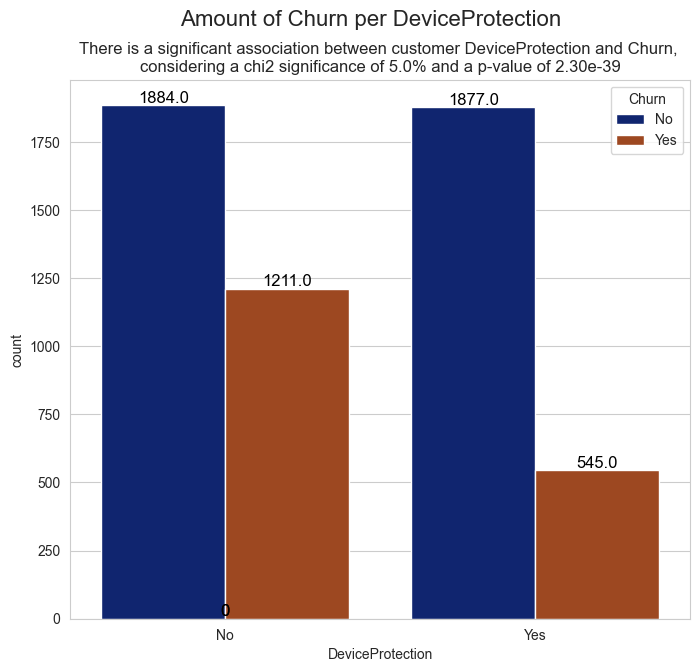

In [19]:
check_qualitative_variable(
    'DeviceProtection', 
    df.query("DeviceProtection != 'No internet service'")
)

### Tech Support
- Desc: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- Dtype: String
- Obs:
    - It seems this variable affects the churn rate
    - Needs to be one-hot-encoded
    - The "No internet service" class is the same of the "Internet Service" variable

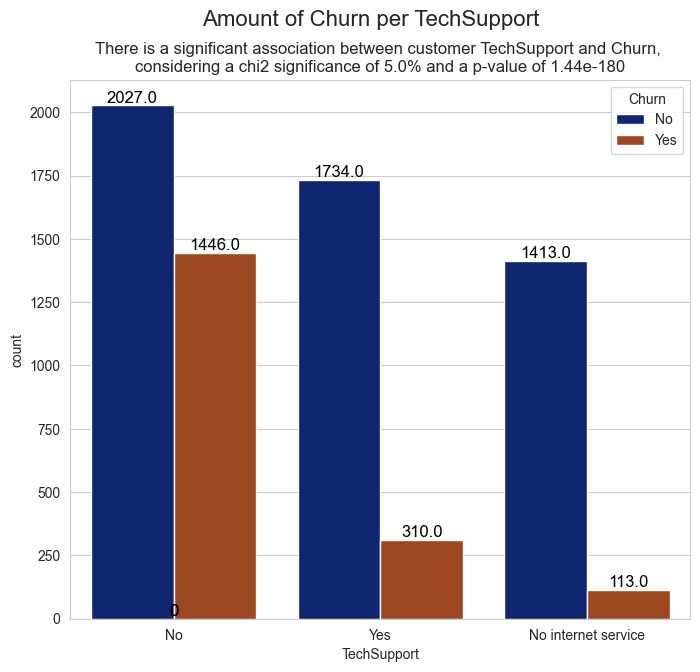

In [20]:
check_qualitative_variable('TechSupport', df)

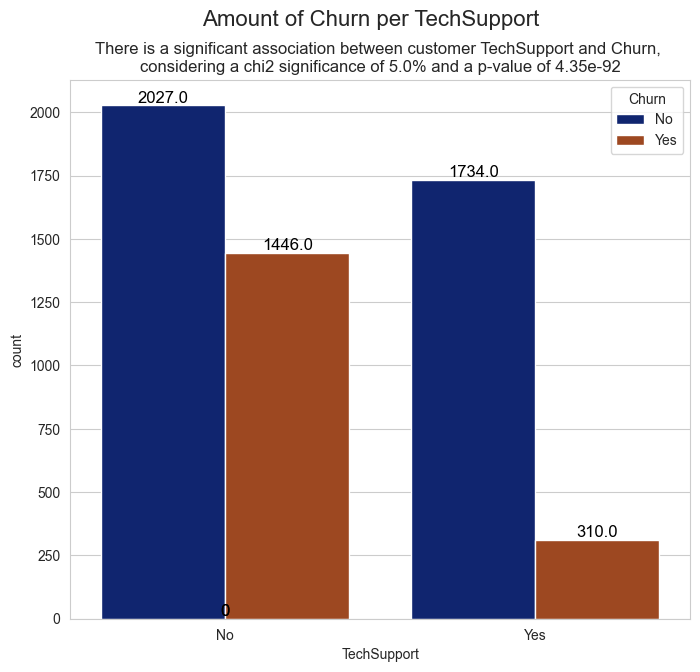

In [21]:
check_qualitative_variable(
    'TechSupport', 
    df.query("TechSupport != 'No internet service'")
)

### Streaming TV
- Desc: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- Dtype: String
- Obs:
    - It seems this variable affects the churn rate
    - Needs to be one-hot-encoded
    - The "No internet service" class is the same of the "Internet Service" variable

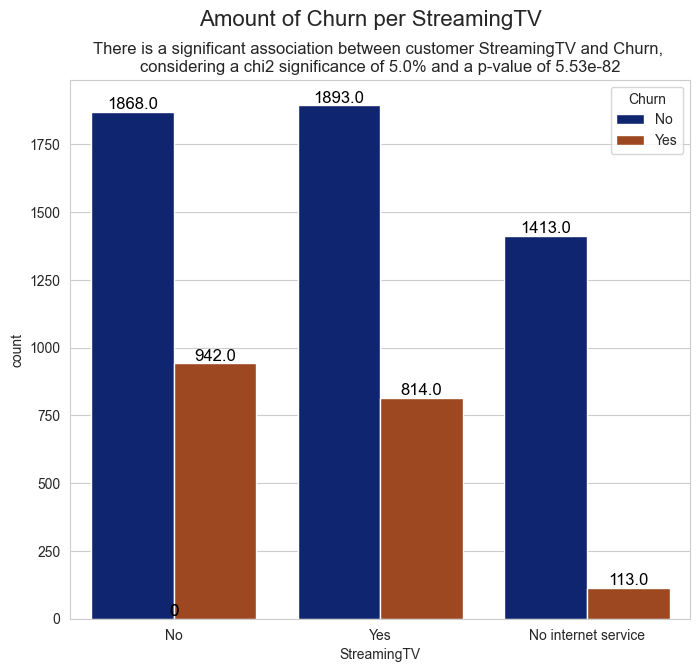

In [22]:
check_qualitative_variable('StreamingTV', df)

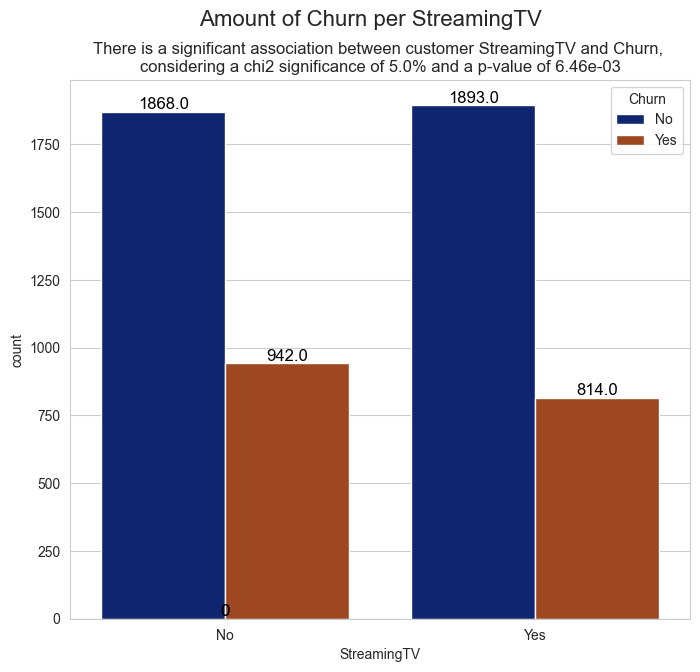

In [23]:
check_qualitative_variable(
    'StreamingTV', 
    df.query("StreamingTV != 'No internet service'")
)

### Streaming Movies
- Desc: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- Dtype: String
- Obs:
    - It seems this variable affects the churn rate
    - Needs to be one-hot-encoded
    - The "No internet service" class is the same of the "Internet Service" variable

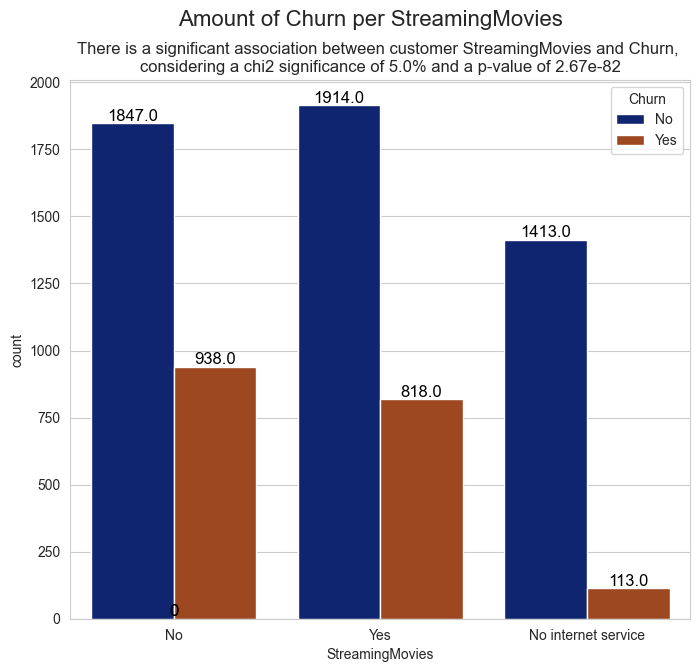

In [24]:
check_qualitative_variable('StreamingMovies', df)

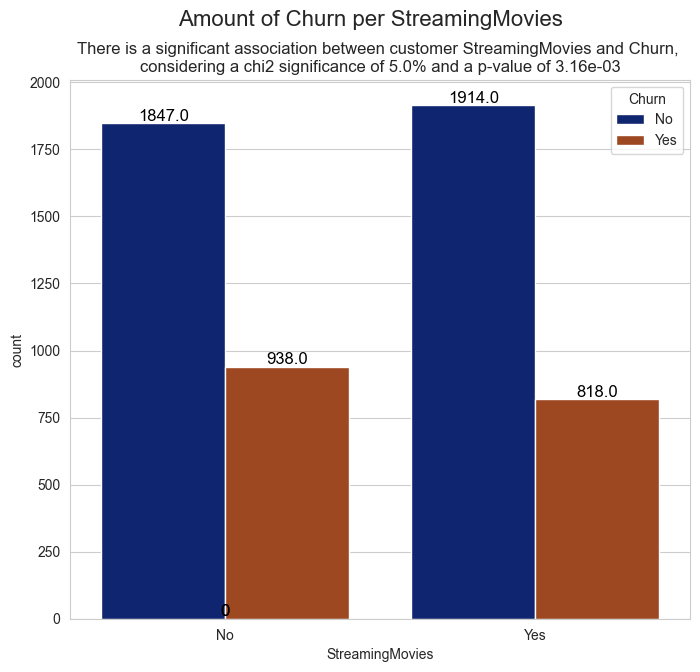

In [25]:
check_qualitative_variable(
    'StreamingMovies', 
    df.query("StreamingMovies != 'No internet service'")
)

### Contract
- Desc: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
- Dtype: String
- Obs:
    - It seems this variable affects the churn rate
    - Needs to be one-hot-encoded

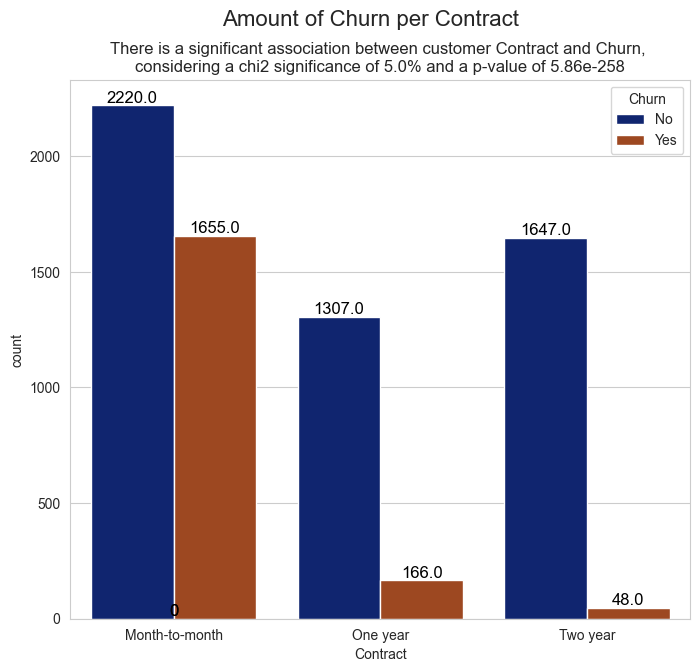

In [26]:
check_qualitative_variable('Contract', df)

### Paperless Billing
- Desc: Indicates if the customer has chosen paperless billing: Yes, No
- Dtype: String
- Obs:
    - It seems this variable affects the churn rate
    - Needs to be one-hot-encoded

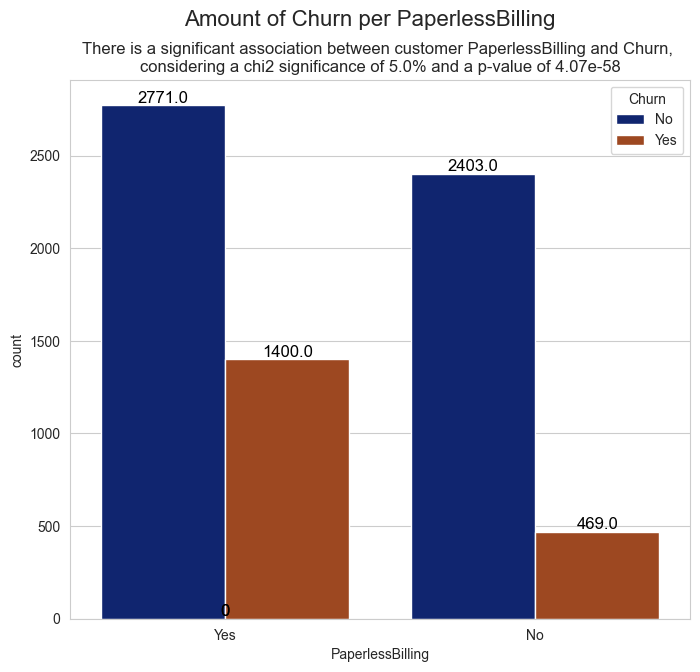

In [27]:
check_qualitative_variable('PaperlessBilling', df)

### Payment Method
- Desc: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- Dtype: String
- Obs:
    - It seems this variable affects the churn rate
    - Needs to be one-hot-encoded

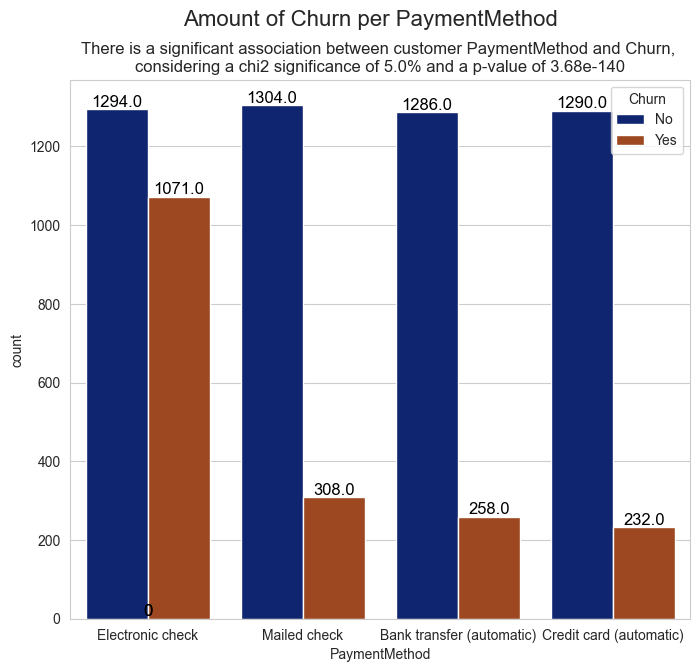

In [28]:
check_qualitative_variable('PaymentMethod', df)

## Quantitative Variables
1. tenure
2. Monthly Charges
3. Total Charges

### Tenure
- Desk:  Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- Dtype: Integer
- Obs:
    - Looks like when we have Churn, the values of tenure are smaller, except for a few outliers

In [33]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

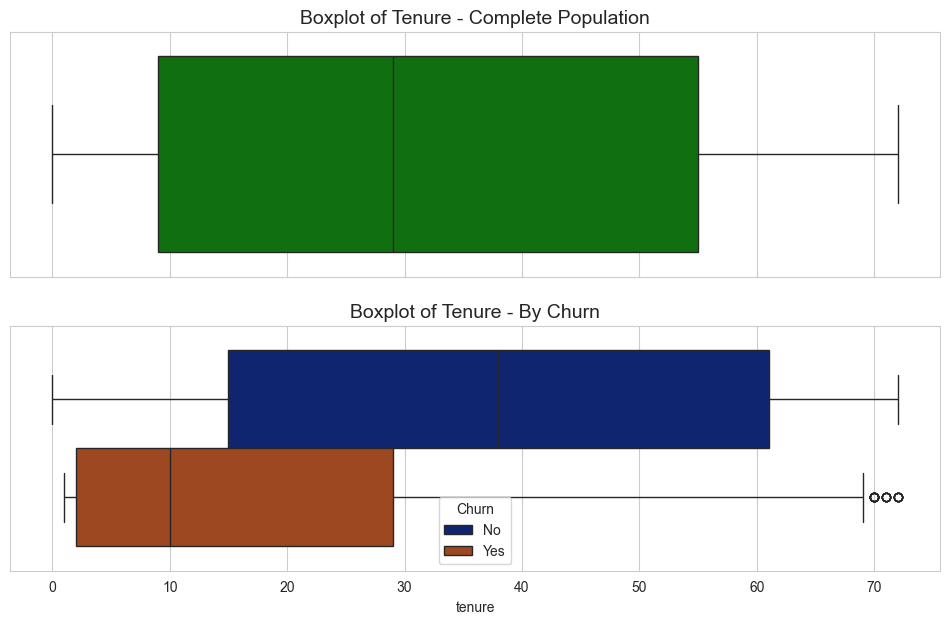

In [75]:
fig, axes = plt.subplots(2, sharex = True)
fig.set_figheight(7)
fig.set_figwidth(12)

sns.boxplot(
    x = 'tenure',
    data = df,
    ax = axes[0],
    color = 'green'
)
axes[0].set_title('Boxplot of Tenure - Complete Population', fontsize = 14)
axes[0].set_xlabel('')

sns.boxplot(
    x = 'tenure',
    data = df,
    hue = 'Churn',
    ax = axes[1]
)
axes[1].set_title('Boxplot of Tenure - By Churn', fontsize = 14)

plt.show()

### Monthly Charges
- Desc: Indicates the customer’s current total monthly charge for all their services from the company.
- Dtype: Float
- Obs:
    - There are no outliers in the distribution

In [45]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

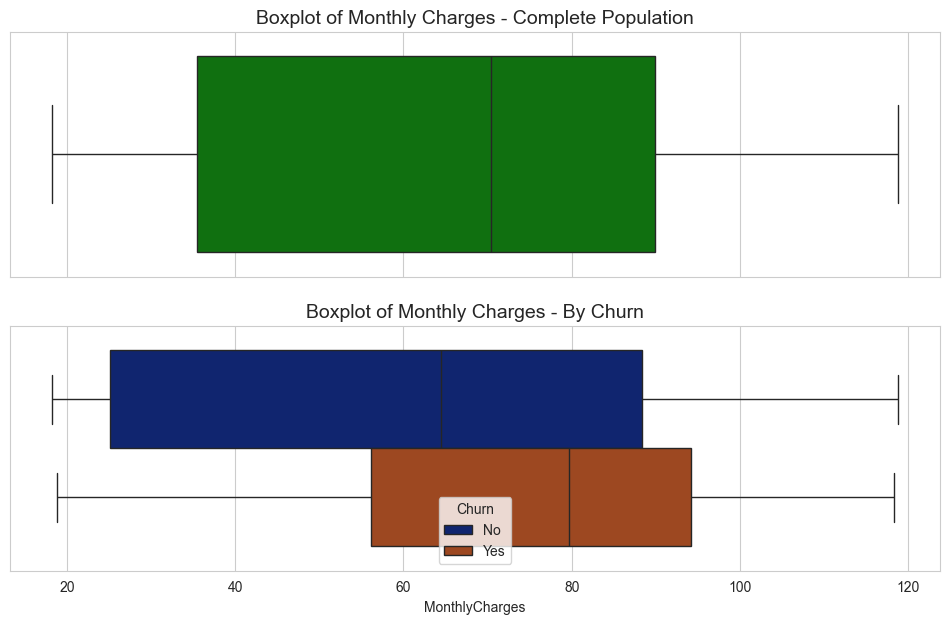

In [77]:
fig, axes = plt.subplots(2, sharex = True)
fig.set_figheight(7)
fig.set_figwidth(12)

sns.boxplot(
    x = 'MonthlyCharges',
    data = df,
    ax = axes[0],
    color = 'green'
)
axes[0].set_title('Boxplot of Monthly Charges - Complete Population', fontsize = 14)
axes[0].set_xlabel('')

sns.boxplot(
    x = 'MonthlyCharges',
    data = df,
    hue = 'Churn',
    ax = axes[1]
)
axes[1].set_title('Boxplot of Monthly Charges - By Churn', fontsize = 14)

plt.show()

### Total Charges
- Desk: Indicates the customer’s total charges
- Dtype: Float
- Obs:
    - If there aren't any charges the value shows as " " (string with a blank space)
    - Looks like when we have Churn, the values of total charges are smaller, but there's a lot os high outliers (maybe old clients?)

In [66]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0').astype(float)
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

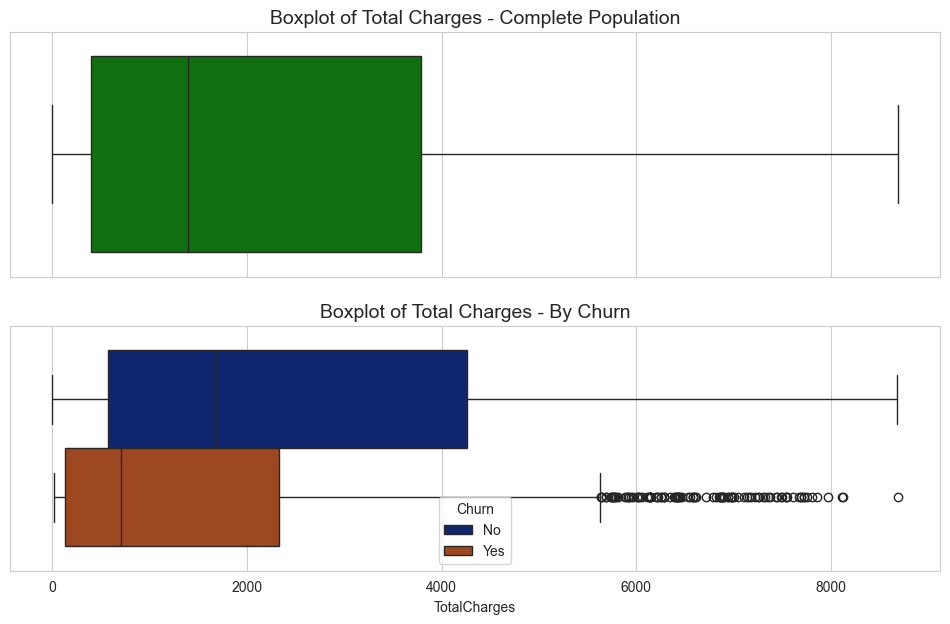

In [78]:
fig, axes = plt.subplots(2, sharex = True)
fig.set_figheight(7)
fig.set_figwidth(12)

sns.boxplot(
    x = 'TotalCharges',
    data = df,
    ax = axes[0],
    color = 'green'
)
axes[0].set_title('Boxplot of Total Charges - Complete Population', fontsize = 14)
axes[0].set_xlabel('')

sns.boxplot(
    x = 'TotalCharges',
    data = df,
    hue = 'Churn',
    ax = axes[1]
)
axes[1].set_title('Boxplot of Total Charges - By Churn', fontsize = 14)

plt.show()

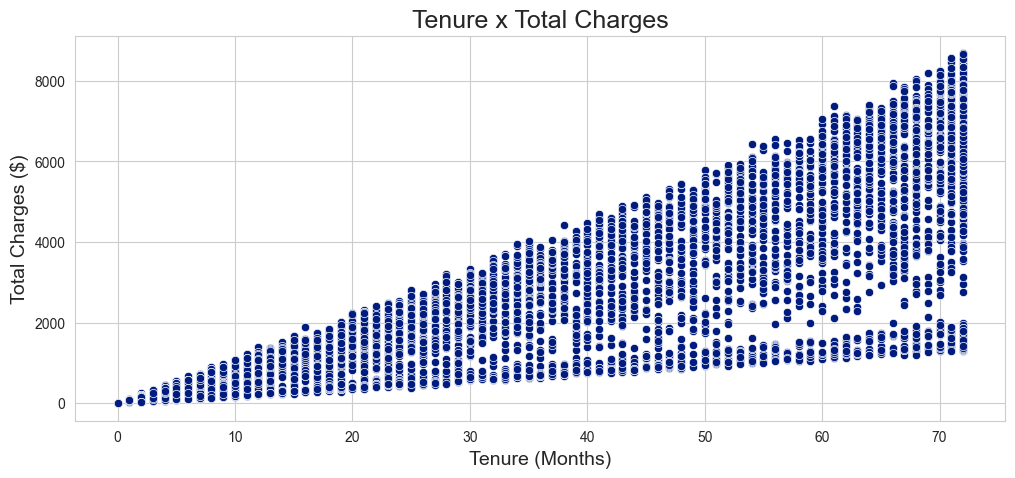

In [90]:
plt.figure(figsize = (12, 5))
sns.scatterplot(
    x = 'tenure',
    y = 'TotalCharges',
    data = df,
)
plt.title('Tenure x Total Charges', fontsize = 18)
plt.xlabel('Tenure (Months)', fontsize = 14)
plt.ylabel('Total Charges ($)', fontsize = 14)
plt.show()

### Correlation between numeric variables
- Obs:
    - There are a strong postive correlation between Tenure and Total Charges

In [106]:
def correlation_matrix(correlation_matrix, ax = None, vmin = -1, vmax = 1):
    '''
    Description:
        - Plots a cool correlation matrix, based on seaborn heatmap
    Arguments:
        - Correlation Matrix Dataset (Ex: "df.corr()")
    '''
    
    # Creates a triangular shaped mask based on the original matrix
    tri_mask = np.triu(np.ones_like(correlation_matrix))

    # Plot the triangular heat map
    sns.heatmap(
        data = correlation_matrix,
        mask = tri_mask,
        annot = True,
        cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True),
        ax = ax,
        vmin = vmin,
        vmax = vmax
    )

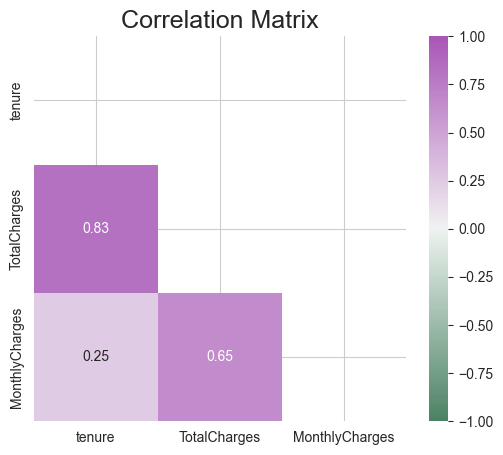

In [105]:
plt.figure(figsize = (6, 5))
plt.title('Correlation Matrix', fontsize = 18)
correlation_matrix(
    df[['tenure', 'TotalCharges', 'MonthlyCharges']].corr()
)